In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [4]:
!wget -q -O 'la_census_data.json' https://data.lacounty.gov/resource/rv2f-zsc7.json
print('Data downloaded!')


Data downloaded!


In [5]:
with open('la_census_data.json') as json_data:
    la_census_data = json.load(json_data)

In [6]:
la_census_data[0]

{'census_tract': '980030',
 'fips': '22412',
 'cityname': 'El Segundo city',
 'service_area': '8',
 'age_0_15': '0',
 'age_16_18': '0',
 'age_19_20': '0',
 'age_21_25': '0',
 'age_26_59': '0',
 'age_60_64': '0',
 'age_65up': '0',
 'male': '0',
 'female': '0',
 'white': '0',
 'african_american': '0',
 'native_american': '0',
 'asian': '0',
 'pacific_islander': '0',
 'other': '0',
 'multi_race': '0',
 'latino': '0'}

In [7]:
la_data=pd.DataFrame(la_census_data)
la_data['cityname'] = la_data['cityname'].str.replace('city', '')
la_data.head()

,census_tract,fips,cityname,service_area,age_0_15,age_16_18,age_19_20,age_21_25,age_26_59,age_60_64,age_65up,male,female,white,african_american,native_american,asian,pacific_islander,other,multi_race,latino
0,980030,22412,El Segundo,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,400604,30014,Glendora,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,910804,55156,Palmdale,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,403312,58072,Pomona,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,408211,36490,Industry,3,6,2,0,2,12,0,8,14,16,14,0,0,14,0,0,0,2


In [6]:
la_data['age_19_20'] = la_data['age_19_20'].apply(pd.to_numeric)
la_data['age_21_25'] = la_data['age_21_25'].apply(pd.to_numeric)
la_df=la_data[['cityname','age_19_20','age_21_25']]
la_df.rename(columns={'cityname': 'Neighborhood','age_19_20': 'Age 19-20','age_21_25': 'Age 21-25' }, inplace=True)
la_df=la_df.groupby('Neighborhood').sum()
la_df=la_df.sort_values(by=['Age 19-20', 'Age 21-25'], ascending=False).reset_index()
la_df.set_index('Neighborhood')
la_df=la_df.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Age 19-20,Age 21-25
0,Los Angeles,32061,84815
1,Long Beach,14540,36986
2,Lancaster,5797,14967
3,Glendale,4309,12927
4,El Monte,3634,9224
5,Downey,3591,9231
6,Compton,3541,8894
7,Inglewood,3357,8628
8,Claremont,3302,3842
9,Carson,3040,7550


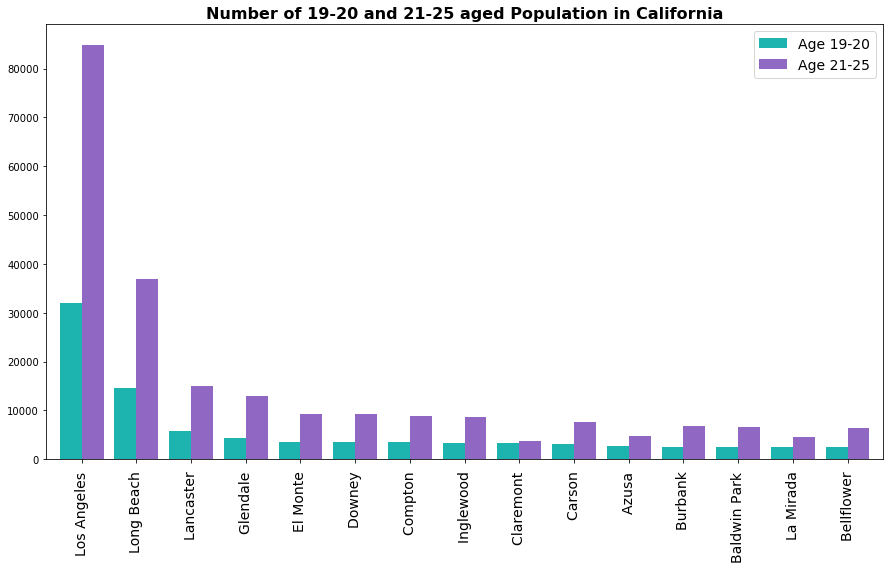

In [7]:
x = np.arange(15)

ax = la_df.plot(kind='bar', alpha=1, figsize=(15, 8), color=['#1db3ae', '#9068c4'], width=0.8, )

ax.set_title("Number of 19-20 and 21-25 aged Population in California" , fontsize='16', fontweight='bold')
ax.legend(loc='upper right', fontsize='14')
plt.xticks(x, (la_df['Neighborhood']), fontsize='14')
plt.yticks()
ax.set_facecolor('w')

In [9]:
la_data['age_19_20'] = la_data['age_19_20'].apply(pd.to_numeric)
la_data['age_21_25'] = la_data['age_21_25'].apply(pd.to_numeric)

la_data['Youth'] = la_data['age_19_20'] + la_data['age_21_25']
la_df2 = la_data.sort_values(by=['Youth'], ascending=False).reset_index(drop=True)
la_df2=la_df2[['census_tract', 'cityname', 'Youth']]
la_df2.rename(columns={'census_tract': 'Population', 'cityname': 'Neighborhood'}, inplace=True)
la_df2=la_df2.groupby('Neighborhood').sum()
la_df2=la_df2.sort_values(by=['Youth'], ascending=False).reset_index()
la_df2=la_df2[['Neighborhood', 'Youth']]
la_df2.set_index('Neighborhood')
la_df2=la_df2.head(15)
la_df2

,Neighborhood,Youth
0,Los Angeles,116876
1,Long Beach,51526
2,Lancaster,20764
3,Glendale,17236
4,El Monte,12858
5,Downey,12822
6,Compton,12435
7,Inglewood,11985
8,Carson,10590
9,Burbank,9475


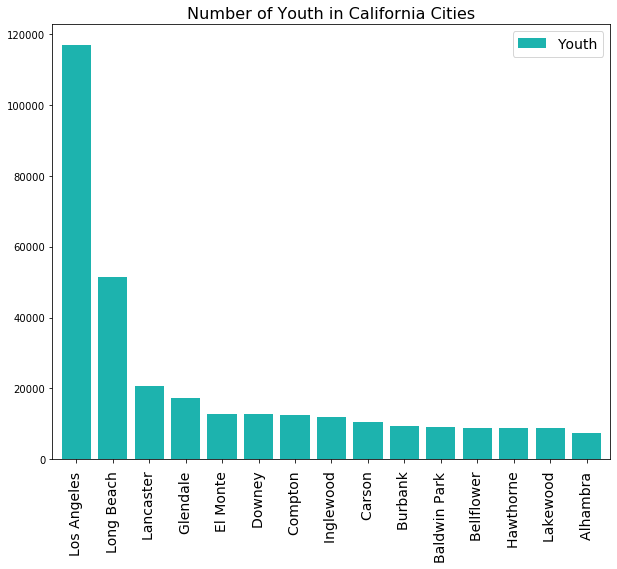

In [9]:
x = np.arange(15)

ax = la_df2.plot(kind='bar', alpha=1, figsize=(10, 8), color=['#1db3ae'], width=0.8, )

ax.set_title("Number of Youth in California Cities" , fontsize='16')
ax.legend(loc='upper right', fontsize='14')
plt.xticks(x, (la_df2['Neighborhood']), fontsize='14')
plt.yticks()
ax.set_facecolor('w')

In [10]:
!wget -q -O 'la_university_data.json' https://data.lacity.org/resource/tip3-gfjj.json
print('Data downloaded!')
with open('la_university_data.json') as json_data:
    la_university_data = json.load(json_data)
la_university_data[0]

Data downloaded!


In [11]:
with open('la_university_data.json') as json_data:
    la_university_data = json.load(json_data)
la_university_data[0]

{'zip_code': '91335-4583',
 ':@computed_region_qz3q_ghft': '18909',
 ':@computed_region_k96s_3jcv': '264',
 'mailing_city': 'LOS ANGELES',
 'city': 'RESEDA',
 ':@computed_region_kqwf_mjcx': '4',
 'business_name': 'A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C',
 ':@computed_region_2dna_qi2s': '12',
 'naics': '611000',
 'primary_naics_description': 'Educational services (including schools, colleges, & universities)',
 'location_description': '18210 SHERMAN 91335-4583',
 ':@computed_region_tatf_ua23': '578',
 'street_address': '18210 SHERMAN WAY #D',
 'mailing_zip_code': '90007-2129',
 'location_start_date': '1991-01-01T00:00:00.000',
 'mailing_address': '2607 VAN BUREN PLACE',
 'location_account': '0000000405-0001-4',
 'council_district': '3',
 'location_1': {'latitude': '34.201',
  'needs_recoding': False,
  'longitude': '-118.5303'}}

In [12]:
la_uni_data=pd.DataFrame(la_university_data)
la_uni=la_uni_data[['city', 'business_name', 'location_1']]
la_uni=pd.concat([la_uni.drop(['location_1'], axis=1), la_uni['location_1'].apply(pd.Series)], axis=1)
la_uni.rename(columns={'city': 'City', 'business_name': 'Education Facility', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace=True)
la_uni=la_uni[['City', 'Education Facility', 'Latitude', 'Longitude']]
la_uni.head()

,City,Education Facility,Latitude,Longitude
0,RESEDA,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,34.201,-118.5303
1,RESEDA,NETANELI HEBREW ACADEMY /C,34.2038,-118.536
2,TARZANA,LYCEE INTERNATIONAL DE LOS ANGELES /C,34.1783,-118.5288
3,WOODLAND HILLS,SCOTT/HOLLY CALIG,34.1526,-118.5783
4,WEST HILLS,SOUTHERN CALIFORNIA CONSERVATORY OF MUSIC CORP...,34.2194,-118.6218


In [13]:
uni_df=la_uni[['City', 'Education Facility']]
uni_df=uni_df.groupby('City').count()
uni_df=uni_df.sort_values(by=['Education Facility'], ascending=False).reset_index()
uni_df

,City,Education Facility
0,WOODLAND HILLS,177
1,TARZANA,81
2,RESEDA,58
3,CANOGA PARK,52
4,WINNETKA,36
5,WEST HILLS,4
6,CHATSWORTH,2
7,NORTHRIDGE,2


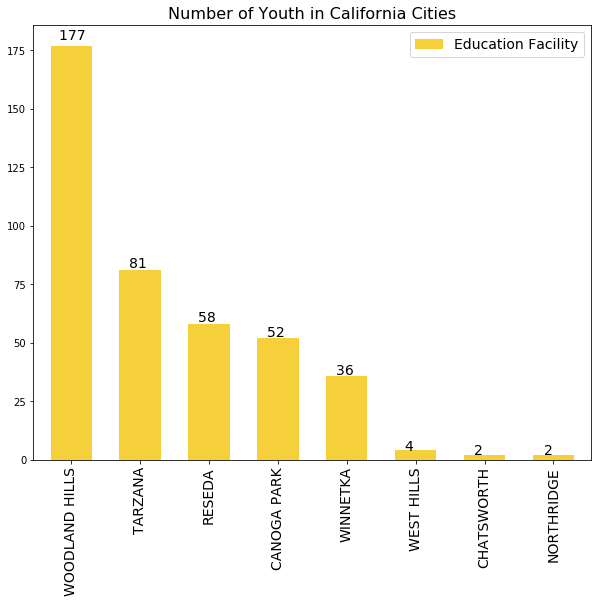

In [40]:
x = np.arange(8)

ax = uni_df.plot(kind='bar', alpha=1, figsize=(10, 8), color=['#f5d03b'], width=0.6, )

ax.set_title("Number of Youth in California Cities" , fontsize='16')
ax.legend(loc='upper right', fontsize='14')
plt.xticks(x, (uni_df['City']), fontsize='14')
plt.yticks()
ax.set_facecolor('w')

for p in ax.patches:
    ax.annotate('  ' + str(p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), fontsize='14')

### Now we can start editing our geolocations to create clusters

In [10]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

In [11]:
la_geo = pd.read_csv("https://usc.data.socrata.com/api/views/9utn-waje/rows.csv?accessType=DOWNLOAD")
la_geo=la_geo[['name','sqmi', 'latitude', 'longitude']]
la_geo.rename(columns={'name': 'Neighborhood', 'sqmi': 'SQMI', 'latitude': 'Longitude', 'longitude': 'Latitude'}, inplace=True)
la_geo.head()

,Neighborhood,SQMI,Longitude,Latitude
0,Acton,39.339109,-118.169810,34.497355
1,Adams-Normandie,0.805350,-118.300208,34.031461
2,Agoura Hills,8.146760,-118.759885,34.146736
3,Agua Dulce,31.462632,-118.317104,34.504927
4,Alhambra,7.623814,-118.136512,34.085539


In [12]:
la_geo.shape

(272, 4)

In [13]:
address = 'Los Angeles City, LA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles City are 34.0536909, -118.2427666.


In [14]:
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(la_geo['Latitude'], la_geo['Longitude'], la_geo['Neighborhood']):
    label = '{}, LA County'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#2ac7ba',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
map_la

In [15]:
CLIENT_ID = 'ARD3ZA1OZ2OHUXJYIEXR4S1LJWBLYS0C1LIKRRSZRMULZ1GA' 
CLIENT_SECRET = 'UL4BY5HE4MIMNBEI1I0AUKUKSSI5J5BPZL3OKCD00GJB2RWB' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET) 

Your credentails:
CLIENT_ID: ARD3ZA1OZ2OHUXJYIEXR4S1LJWBLYS0C1LIKRRSZRMULZ1GA
CLIENT_SECRET:UL4BY5HE4MIMNBEI1I0AUKUKSSI5J5BPZL3OKCD00GJB2RWB


In [21]:
nbhd_latitude = la_geo.loc[271, 'Latitude'] # neighborhood latitude value
nbhd_longitude = la_geo.loc[271, 'Longitude'] # neighborhood longitude value
nbhd_name = la_geo.loc[271, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(nbhd_name, 
                                                               nbhd_latitude, 
                                                               nbhd_longitude))


Latitude and longitude values of Woodland Hills are 34.159408692550485, -118.61521650000006.


In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nbhd_latitude, 
    nbhd_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(50)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Mangia Manor,Bakery,34.161109,-118.614633
1,e-Motion Training,Gym / Fitness Center,34.158111,-118.615593
2,Deats Stewart Deats Design,Wine Bar,34.159030,-118.612447
3,F or D,Arts & Entertainment,34.158239,-118.618153
4,Woodland Hills Carpet Restoration,Carpet Store,34.158725,-118.618393
5,"Le Zig Zag Club, Paris",Asian Restaurant,34.162803,-118.615821


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
la_venues = getNearbyVenues(names=la_geo['Neighborhood'],
                                   latitudes=la_geo['Latitude'],
                                   longitudes=la_geo['Longitude']
                                  )
print(la_venues.shape)
la_venues.head()

Acton
Adams-Normandie
Agoura Hills
Agua Dulce
Alhambra
Alondra Park
Artesia
Altadena
Angeles Crest
Arcadia
Arleta
Arlington Heights
Athens
Atwater Village
Avalon
Avocado Heights
Azusa
Vermont-Slauson
Baldwin Hills/Crenshaw
Baldwin Park
Bel-Air
Bellflower
Bell Gardens
Green Valley
Bell
Beverly Crest
Beverly Grove
Burbank
Koreatown
Beverly Hills
Beverlywood
Boyle Heights
Bradbury
Brentwood
Broadway-Manchester
Calabasas
Canoga Park
Carson
Carthay
Castaic Canyons
Chatsworth
Castaic
Central-Alameda
Century City
Cerritos
Charter Oak
Chatsworth Reservoir
Chesterfield Square
Cheviot Hills
Chinatown
Citrus
Claremont
Northridge
Commerce
Compton
Cypress Park
La Mirada
Covina
Cudahy
Culver City
Del Aire
Del Rey
Desert View Highlands
Diamond Bar
Downey
Downtown
Duarte
Eagle Rock
East Compton
East Hollywood
East La Mirada
Elizabeth Lake
East Los Angeles
East Pasadena
East San Gabriel
Echo Park
El Monte
El Segundo
El Sereno
Elysian Park
Elysian Valley
Vermont Square
Encino
Exposition Park
Fairfax
Flo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,34.497355,-118.169810,Epik Engineering,34.498718,-118.168046,Construction & Landscaping
1,Acton,34.497355,-118.169810,Alma Gardening Co.,34.494762,-118.172550,Construction & Landscaping
2,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
3,Adams-Normandie,34.031461,-118.300208,Shell,34.033095,-118.300025,Gas Station
4,Adams-Normandie,34.031461,-118.300208,Little Xian,34.032292,-118.299465,Sushi Restaurant


In [29]:
la_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,2,2,2,2,2,2
Adams-Normandie,9,9,9,9,9,9
Agoura Hills,27,27,27,27,27,27
Agua Dulce,1,1,1,1,1,1
Alhambra,13,13,13,13,13,13
Alondra Park,3,3,3,3,3,3
Altadena,4,4,4,4,4,4
Arcadia,23,23,23,23,23,23
Arleta,4,4,4,4,4,4


In [30]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 318 uniques categories.


In [31]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

,Yoga Studio,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Check Cashing Service,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donburi Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Reservoir,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Stationery Store,Steakhouse,St

In [32]:
la_onehot.shape

(2950, 318)

In [33]:
la_onehot.shape
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()

In [34]:
la_grouped.shape

(232, 318)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

for hood in la_grouped['Neighborhood']:
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Construction & Landscaping,Women's Store,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
1,Adams-Normandie,Sushi Restaurant,Playground,Park,Furniture / Home Store,Grocery Store,Taco Place,Gas Station,Farm,Farmers Market,Falafel Restaurant
2,Agoura Hills,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Café,Shopping Mall,Bakery,Liquor Store,BBQ Joint,Brewery,Restaurant
3,Agua Dulce,Airport,Women's Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm
4,Alhambra,Convenience Store,Mexican Restaurant,Video Store,Breakfast Spot,Fast Food Restaurant,Bagel Shop,Pet Store,Hardware Store,Sporting Goods Shop,Pizza Place


In [38]:
# set number of clusters
kclusters = 5
la_grouped_clustering = la_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)
# cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3], dtype=int32)

In [39]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

la_merged = la_geo


la_merged = la_geo.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merged.dropna(subset = ["Cluster Labels"], inplace=True)
la_merged['Cluster Labels'] =la_merged['Cluster Labels'].astype(int)
la_merged.head()

,Neighborhood,SQMI,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,39.339109,-118.169810,34.497355,3,Construction & Landscaping,Women's Store,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
1,Adams-Normandie,0.805350,-118.300208,34.031461,3,Sushi Restaurant,Playground,Park,Furniture / Home Store,Grocery Store,Taco Place,Gas Station,Farm,Farmers Market,Falafel Restaurant
2,Agoura Hills,8.146760,-118.759885,34.146736,3,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Café,Shopping Mall,Bakery,Liquor Store,BBQ Joint,Brewery,Restaurant
3,Agua Dulce,31.462632,-118.317104,34.504927,3,Airport,Women's Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farm
4,Alhambra,7.623814,-118.136512,34.085539,2,Convenience Store,Mexican Restaurant,Video Store,Breakfast Spot,Fast Food Restaurant,Bagel Shop,Pet Store,Hardware Store,Sporting Goods Shop,Pizza Place


In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
cluster0=la_merged.loc[la_merged['Cluster Labels'] == 0, la_merged.columns[[0] + list(range(5, la_merged.shape[1]))]]
cluster0.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Beverly Hills,Food Truck,Women's Store,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
33,Brentwood,Food Truck,Café,Women's Store,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
44,Cerritos,Food Truck,Korean Restaurant,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
196,Rowland Heights,Food Truck,Mexican Restaurant,Women's Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
197,Santa Fe Springs,Food Truck,Clothing Store,Women's Store,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant


In [61]:
cluster1=la_merged.loc[la_merged['Cluster Labels'] == 1, la_merged.columns[[0] + list(range(5, la_merged.shape[1]))]]
cluster1.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Glendale,Trail,Women's Store,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
161,Mount Washington,Trail,Park,Garden,Fabric Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor
191,Rancho Palos Verdes,Trail,Women's Store,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
211,Sierra Madre,Trail,Gourmet Shop,Home Service,Coffee Shop,Fabric Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
235,Tujunga,Lake,Trail,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop


In [62]:
cluster2=la_merged.loc[la_merged['Cluster Labels'] == 2, la_merged.columns[[0] + list(range(5, la_merged.shape[1]))]]
cluster2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Alhambra,Convenience Store,Mexican Restaurant,Video Store,Breakfast Spot,Fast Food Restaurant,Bagel Shop,Pet Store,Hardware Store,Sporting Goods Shop,Pizza Place
14,Avalon,Golf Course,Mexican Restaurant,American Restaurant,Playground,Fish & Chips Shop,Falafel Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
15,Avocado Heights,Mexican Restaurant,Fast Food Restaurant,Bakery,Fried Chicken Joint,Diner,Pizza Place,Discount Store,Liquor Store,Taco Place,Grocery Store
19,Baldwin Park,Liquor Store,Thrift / Vintage Store,Latin American Restaurant,Mexican Restaurant,Business Service,Italian Restaurant,Women's Store,Ethiopian Restaurant,Eye Doctor,Fabric Shop
21,Bellflower,Pizza Place,Sandwich Place,Mexican Restaurant,Video Game Store,Burger Joint,Supermarket,Fast Food Restaurant,Dry Cleaner,Mobile Phone Shop,Grocery Store


In [57]:
cluster3=la_merged.loc[la_merged['Cluster Labels'] == 3, la_merged.columns[[0] + list(range(5, la_merged.shape[1]))]]
cluster3.tail(6)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
264,Westwood,Hotel,Bus Station,Coffee Shop,Pool,College Theater,Fast Food Restaurant,Café,Steakhouse,Supermarket,Food Truck
266,Whittier Narrows,Park,Food Truck,Lake,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor
267,Willowbrook,Child Care Service,Breakfast Spot,Convenience Store,Grocery Store,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop
269,Windsor Square,Scenic Lookout,Gym / Fitness Center,Dog Run,Women's Store,Fabric Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor
270,Winnetka,Latin American Restaurant,Health & Beauty Service,Grocery Store,Bakery,Pizza Place,Convenience Store,Fried Chicken Joint,Filipino Restaurant,Mexican Restaurant,Ice Cream Shop
271,Woodland Hills,Wine Bar,Carpet Store,Gym / Fitness Center,Asian Restaurant,Arts & Entertainment,Bakery,Women's Store,Fabric Shop,Empanada Restaurant,English Restaurant


In [64]:
cluster4=la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[0] + list(range(5, la_merged.shape[1]))]]
cluster4.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Baldwin Hills/Crenshaw,Park,Clothing Store,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
40,Chatsworth,Park,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market
45,Charter Oak,Park,Moving Target,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant
96,Hacienda Heights,Park,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market
122,La Crescenta-Montrose,Park,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market
